## 2022.07.15

导入依赖包：

In [1]:
import numpy as np
import cvxpy as cp

定义数据：

In [2]:
# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

定义优化问题：

In [3]:
x = cp.Variable(n)

# 目标
objective = cp.Minimize(cp.sum_squares(A @ x - b))

# 约束
constraints = [0 <= x, x <= 1]

prob = cp.Problem(objective, constraints)

问题求解：

In [4]:
# The optimal objective is returned by prob.solve().
result = prob.solve()

获取优化结果：

In [5]:
# The optimal value for x is stored in x.value.
print(x.value)
# The optimal Lagrange multiplier for a constraint
# is stored in constraint.dual_value.
print(constraints[0].dual_value)

[-1.79109255e-19  2.85112420e-02  2.79973443e-19  3.37658729e-20
 -2.72802663e-19  1.49285011e-01 -9.94082533e-20  8.35373900e-20
  2.46718649e-01  5.78224144e-01 -4.03739463e-19  1.01242860e-03
 -9.28486180e-20  2.26767464e-01 -1.58813678e-19 -8.97232272e-20
 -1.22145729e-19 -1.51509428e-19  1.12060672e-19 -3.48318635e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


## 2022.07.17

### 约束几何规划

导入依赖包：

In [6]:
import cvxpy as cp

定义优化问题：

In [7]:
x = cp.Variable(pos=True)
y = cp.Variable(pos=True)
z = cp.Variable(pos=True)


# 目标
objective = cp.Maximize(x * y * z)

# 约束
constraints = [
    4 * x * y * z + 2 * x * z <= 10,
    x <= 2*y,
    y <= 2*x,
    z >= 1,
]

problem = cp.Problem(objective, constraints)

问题求解：

In [9]:
# The optimal objective is returned by prob.solve().
problem.solve(gp=True)

1.9999999938309496

获取优化结果：

In [10]:
print("Optimal value: ", problem.value)
print("x: ", x.value)
print("y: ", y.value)
print("z: ", z.value)

Optimal value:  1.9999999938309496
x:  0.9999999989682057
y:  1.999999974180587
z:  1.0000000108569758


### 约束反凸规划

导入依赖包：

In [11]:
import cvxpy as cp

定义优化问题：

In [12]:
x = cp.Variable()
y = cp.Variable(pos=True)
objective_fn = -cp.sqrt(x) / y
problem = cp.Problem(cp.Minimize(objective_fn), [cp.exp(x) <= y])

问题求解：

In [13]:
# The optimal objective is returned by prob.solve().
problem.solve(qcp=True)
assert problem.is_dqcp()

获取优化结果：

In [14]:
print("Optimal value: ", problem.value)
print("x: ", x.value)
print("y: ", y.value)

Optimal value:  -0.4288817375157048
x:  0.49999737143004713
y:  1.648717724845007


## 2022.07.18

### 约束矩阵求解

导入依赖包：

In [ ]:
import cvxpy as cp

定义优化问题：

In [ ]:
input_array = np.array([4,5,6,5,11,7,20,18,20,21, 43, 37, 40, 23, 45, 39, 28, 12, 9, 16, 23, 34, 31])
# test_arr = np.array([1,1,1,0,1,1,1,0,0,1])
groups = 3

# Matrix variable with shape (1, 5).
x = cp.Variable((1, len(input_array)))


# 目标
objective = cp.Maximize(x * y * z)

# 约束
constraints = [
    4 * x * y * z + 2 * x * z <= 10,
    x <= 2*y,
    y <= 2*x,
    z >= 1,
]

problem = cp.Problem(objective, constraints)

问题求解：

In [ ]:
# The optimal objective is returned by prob.solve().
problem.solve(gp=True)

1.9999999938309496

获取优化结果：

In [ ]:
print("Optimal value: ", problem.value)
print("x: ", x.value)
print("y: ", y.value)
print("z: ", z.value)

Optimal value:  1.9999999938309496
x:  0.9999999989682057
y:  1.999999974180587
z:  1.0000000108569758


(array([ 1.,  0.,  0.,  3., 10.,  7.,  2.,  1.,  0.,  1.]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

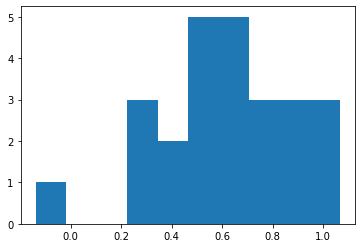

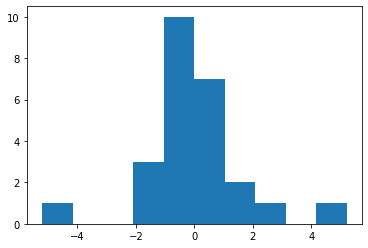

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

rng = np.random.RandomState(0)
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
qt = QuantileTransformer(n_quantiles=10, output_distribution='normal', random_state=0)
X_trans = qt.fit_transform(X)

counts, bins = np.histogram(X)
plt.figure()
plt.hist(bins[:-1], bins, weights=counts)

counts, bins = np.histogram(X_trans)
plt.figure()
plt.hist(bins[:-1], bins, weights=counts)

两点连线：

In [2]:
from numpy import ones,vstack
from numpy.linalg import lstsq
points = [(1,5),(3,4)]
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords,rcond=None)[0]
print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

Line Solution is y = -0.5000000000000007x + 5.500000000000002
